# Look at time series of ocean dynamics (zos variable) from CMIP5 and CMIP6 models

In [1]:
import sys

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../code/')
import mod_loc as loc
import mod_postpro as pp

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [2]:
import dask.config as dc
dc.set(**{'array.slicing.split_large_chunks': True})

In [3]:
python_data_dir = '../outputs/'

In [4]:
cmip5_zos = pp.read_zos_ds(python_data_dir, 'cmip5', 'rcp85')
cmip5_zos = loc.rotate_longitude(cmip5_zos, 'lon')
cmip5_zos

,Array,Chunk
Bytes,2.91 GiB,2.33 MiB
Shape,"(30, 201, 180, 360)","(1, 106, 180, 16)"
Count,1887 Tasks,1380 Chunks
Type,float64,numpy.ndarray


In [5]:
cmip6_zos = pp.read_zos_ds(python_data_dir, 'cmip6', 'ssp585')
cmip6_zos

<xarray.Dataset>
Dimensions:                 (lat: 180, lon: 360, model: 23, time: 200)
Coordinates:
  * model                   (model) object 'ACCESS-CM2' ... 'MIROC6'
  * time                    (time) float64 1.9e+03 1.902e+03 ... 2.1e+03
  * lat                     (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                     (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
Data variables:
    CorrectedReggrided_zos  (model, time, lat, lon) float64 dask.array<chunksize=(1, 115, 180, 360), meta=np.ndarray>
Attributes:
    source_file:        This NetCDF file was built from ComputeOceanDynmicSea...
    creation_date:      2021-07-15 00:33
    emission_scenario:  historical

In [6]:
start_year = 1970 #2006
end_year = 2101

lon_min, lon_max, lat_min, lat_max = pp.define_area('knmi14_reg')

In [7]:
cmip5_df = pp.ds2df(cmip5_zos, lon_min, lon_max, lat_min, lat_max, start_year, end_year)
cmip6_df = pp.ds2df(cmip6_zos, lon_min, lon_max, lat_min, lat_max, start_year, end_year)
cmip5_df

/Users/dewilebars/anaconda3/envs/p39ds/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


,ACCESS1-0,CCSM4,CMCC-CESM,CMCC-CM,CMCC-CMS,CNRM-CM5,CSIRO-Mk3-6-0,CanESM2,EC-EARTH,GFDL-CM3,...,MIROC-ESM-CHEM,MIROC5,MPI-ESM-LR,MPI-ESM-MR,MRI-CGCM3,NorESM1-M,NorESM1-ME,bcc-csm1-1,bcc-csm1-1-m,inmcm4
time,,,,,,,,,,,,,,,,,,,,,
1970.5,-0.179020,4.263253,0.871881,-2.962340,-3.364370,-1.909545,2.762454,-1.324011,0.990907,5.101472,...,-0.583711,-5.295714,-0.982977,1.572509,6.121412,1.971064,0.802684,1.469928,1.539525,-2.713708
1971.5,0.342884,-1.949109,-1.679061,-8.418810,-0.913039,-1.228904,-1.155307,-0.869283,-0.010974,1.826216,...,-0.420656,-3.254537,-2.449820,0.964487,6.877741,0.305974,-1.300600,0.576805,-0.582818,-0.350536
1972.5,3.278651,2.683395,-3.004599,-3.195818,-1.490670,-2.765477,-2.750533,-1.443187,-1.836473,0.340785,...,0.840089,-4.849134,-4.776952,-2.422548,7.449520,1.750676,-0.046052,-6.794261,-4.241983,-3.261629
1973.5,1.990684,-2.617767,-2.931196,-5.632348,-2.276599,-2.716238,-1.763719,-0.979110,-3.796297,2.359685,...,3.041480,-4.435949,-0.926309,-6.395258,3.550080,-1.107173,-1.574755,-5.458283,-4.037578,-0.390000
1974.5,2.683315,2.927358,1.170690,-6.230012,0.525801,2.732157,-8.371796,-1.017084,-3.303496,-1.658079,...,3.736472,-5.142572,-1.663405,-4.698572,1.507208,-2.312271,-1.582958,-4.482859,3.146028,-7.308254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096.5,29.607797,7.922522,3.958708,31.512954,16.963778,10.447077,9.372843,1.961126,18.106114,25.119993,...,23.611012,27.004613,8.402209,20.723305,22.393141,-2.129309,-0.588395,19.613454,7.114775,17.494954
2097.5,28.963902,4.438567,2.827800,29.282992,18.700005,14.185214,9.677474,1.912960,18.788645,21.684745,...,27.740982,28.274644,11.320462,18.074946,25.707589,-2.142463,-5.029265,14.508022,4.073269,13.461390
2098.5,23.182390,-4.521353,5.785284,30.336887,22.579167,12.911133,7.356769,2.774823,19.179581,20.744272,...,26.691721,28.914477,11.669660,19.708019,22.790518,-2.849316,-4.688030,13.469174,2.449303,15.024123


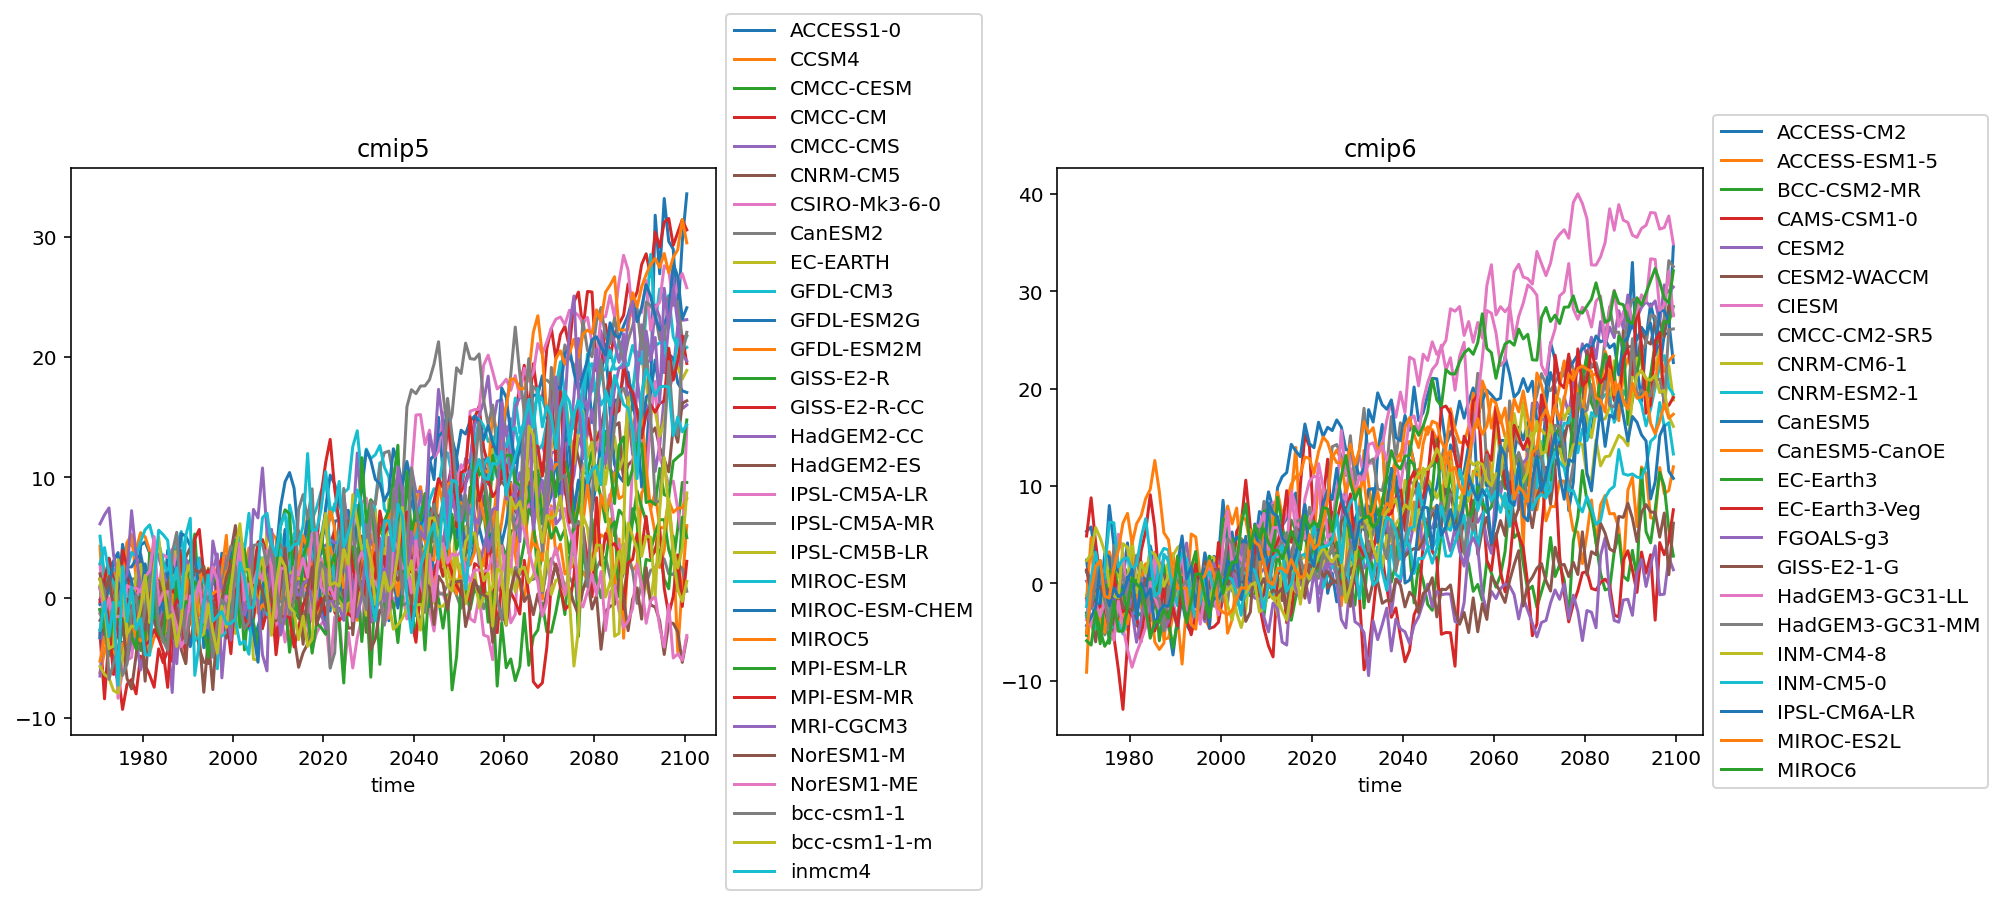

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(14,6))

cmip5_df.plot(ax=axes[0], title='cmip5').legend(loc='center left', bbox_to_anchor=(1, 0.5))
cmip6_df.plot(ax=axes[1], title='cmip6').legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()

### Check the value distribution in 2090-2100

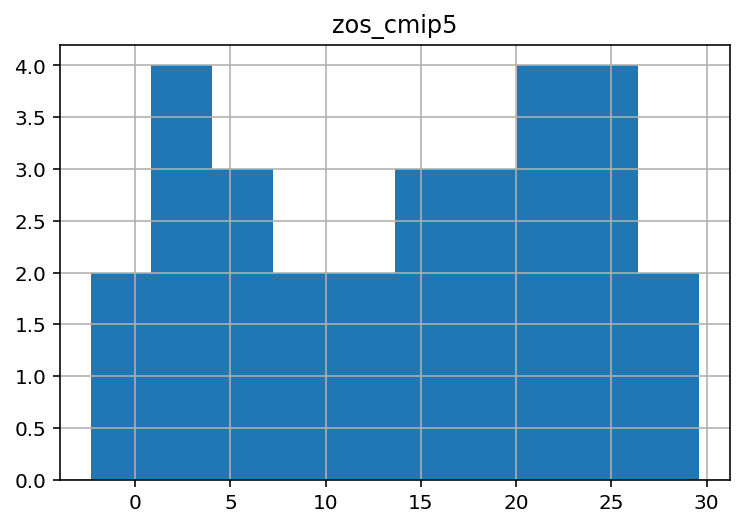

In [73]:
cmip5_2090_2100_df = pd.DataFrame(cmip5_df.loc[2090.5:2099.5].mean(axis=0), columns=['zos_cmip5'] )
cmip5_2090_2100_df.index.name = 'model'
cmip5_hist = cmip5_2090_2100_df.hist(bins=10)

array([[<AxesSubplot:title={'center':'zos_cmip6'}>]], dtype=object)

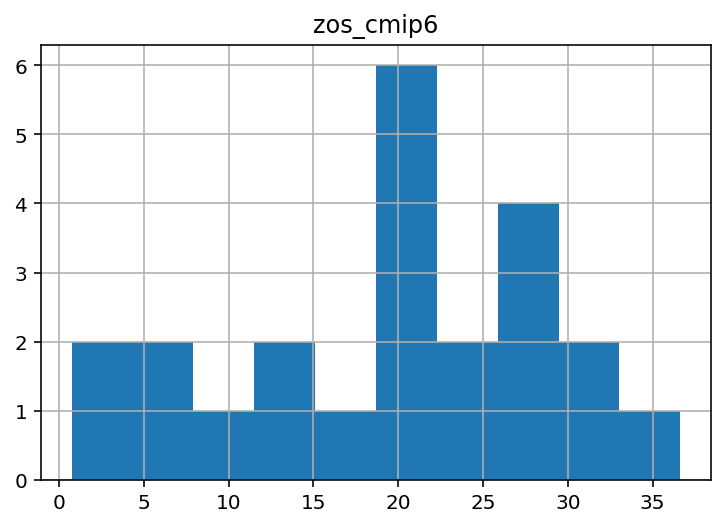

In [74]:
cmip6_2090_2100_df = pd.DataFrame(cmip6_df.loc[2090.5:2099.5].mean(axis=0), columns=['zos_cmip6'] )
cmip6_2090_2100_df.index.name = 'model'
cmip6_2090_2100_df.hist(bins=10)

### Check the mean and likely range

In [75]:
stat_df = pd.DataFrame(cmip5_df.mean(axis=1), columns=['cmip5_mean'] )
stat_df['cmip5_std'] = cmip5_df.std(axis=1)
stat_df['cmip5_95pc'] = stat_df['cmip5_mean'] + 1.64*stat_df['cmip5_std']
stat_df['cmip5_5pc'] = stat_df['cmip5_mean'] - 1.64*stat_df['cmip5_std']
stat_df['cmip6_mean'] = cmip6_df.mean(axis=1)
stat_df['cmip6_std'] = cmip6_df.std(axis=1)
stat_df['cmip6_95pc'] = stat_df['cmip6_mean'] + 1.64*stat_df['cmip6_std']
stat_df['cmip6_5pc'] = stat_df['cmip6_mean'] - 1.64*stat_df['cmip6_std']


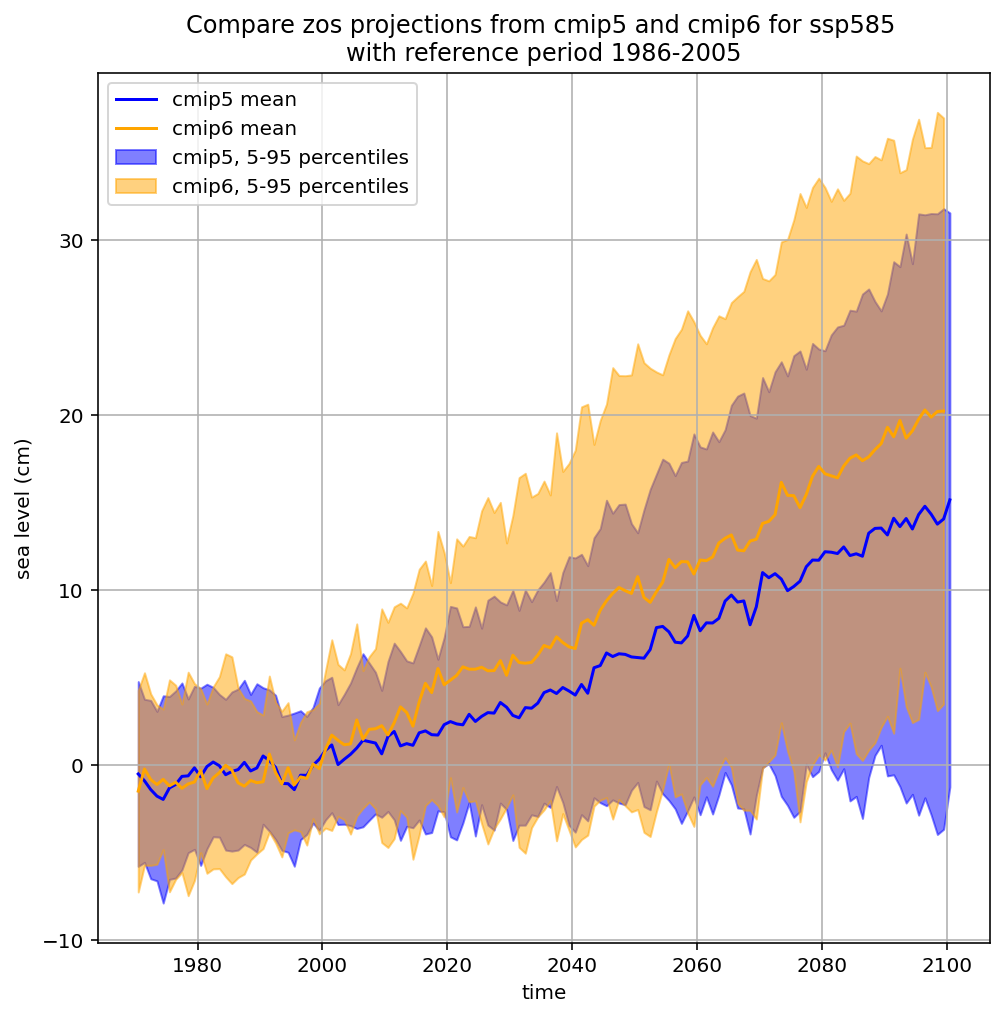

In [76]:
#Plot time series
fig, ax = plt.subplots(figsize=(8,8))
ax.fill_between(stat_df.index, stat_df['cmip5_95pc'], 
                stat_df['cmip5_5pc'], color='blue',alpha=0.5,
               label='cmip5, 5-95 percentiles')
ax.fill_between(stat_df.index, stat_df['cmip6_95pc'], 
                stat_df['cmip6_5pc'], color='orange',alpha=0.5,
               label='cmip6, 5-95 percentiles')
ax.plot(stat_df['cmip5_mean'], color='blue', label='cmip5 mean')
ax.plot(stat_df['cmip6_mean'], color='orange', label='cmip6 mean')

plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title(f'Compare zos projections from cmip5 and cmip6 for {sce} \n'+
         'with reference period 1986-2005')
ax.grid(True)
plt.legend(loc='upper left')

plt.savefig('../figures/zos_comp_rcp85_ssp585_DutchCoast_ts.pdf', dpi=150)

In [47]:
stat_df.loc[2090.5:2099.5].mean(axis=0)

cmip5_mean    13.971134
cmip5_std      9.832084
cmip5_95pc    30.095752
cmip5_5pc     -2.153484
cmip6_mean    19.590209
cmip6_std      9.822038
cmip6_95pc    35.698352
cmip6_5pc      3.482066
dtype: float64

In [77]:
stat_df.loc[2099.5]

cmip5_mean    14.060079
cmip5_std     10.815338
cmip5_95pc    31.797233
cmip5_5pc     -3.677076
cmip6_mean    20.230298
cmip6_std     10.215606
cmip6_95pc    36.983891
cmip6_5pc      3.476705
Name: 2099.5, dtype: float64

### Temporal evolution of the standard deviations

<AxesSubplot:xlabel='time'>

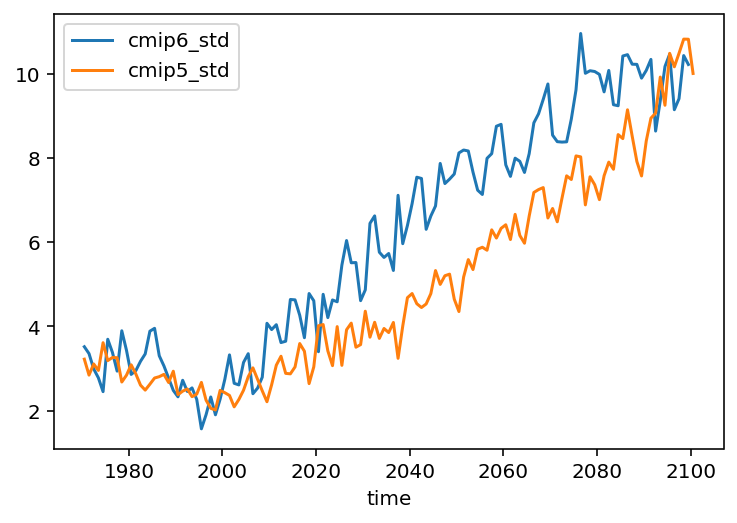

In [78]:
stat_df[['cmip6_std', 'cmip5_std']].plot()